   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


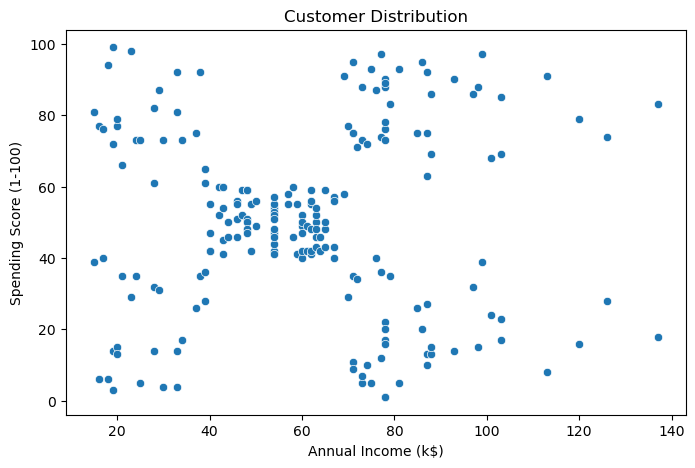

C:\Users\91636\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91636\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91636\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91636\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

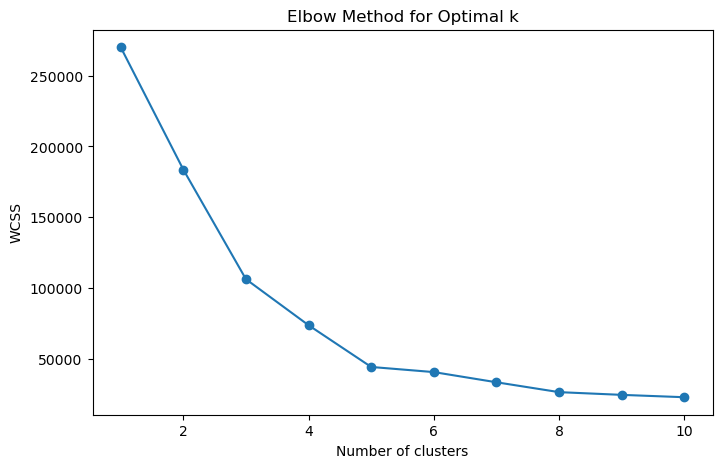

C:\Users\91636\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


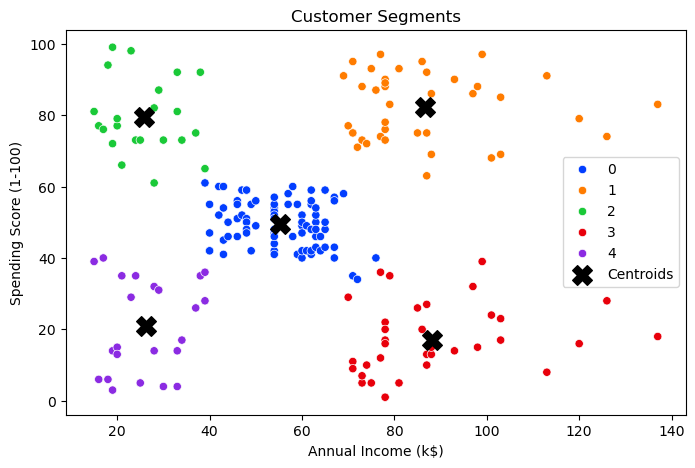

In [3]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


# Load the dataset
df = pd.read_csv(r"C:\Users\91636\Downloads\Kmeans\Mall_Customers.csv")

# Display the first few rows
print(df.head())

# Select features for clustering (Annual Income and Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Visualize the data
plt.figure(figsize=(8,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Customer Distribution')
plt.show()

# Find the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans with the optimal number of clusters (let's assume k=5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster info to original dataframe
df['Cluster'] = y_kmeans

# Visualize the clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='bright')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids', marker='X')
plt.title('Customer Segments')
plt.legend()
plt.show()


C:\Users\91636\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91636\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91636\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91636\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

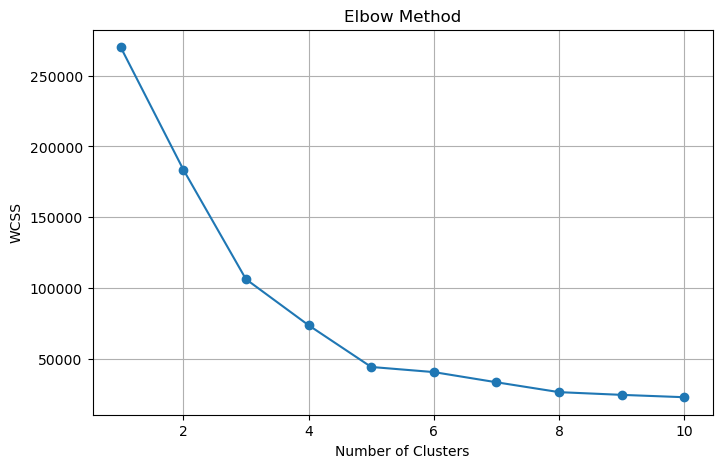

C:\Users\91636\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


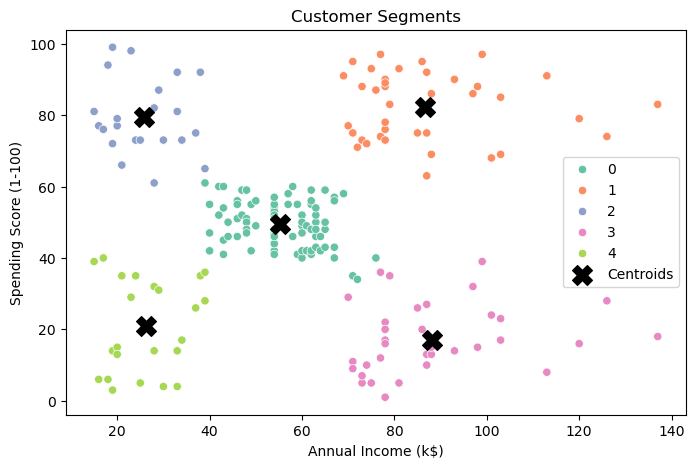

['kmeans_model.pkl']

In [5]:
import os
os.environ['OMP_NUM_THREADS'] = '1'  # Prevent MKL memory leak on Windows

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import joblib

# Load the data
df = pd.read_csv(r"C:\Users\91636\Downloads\Kmeans\Mall_Customers.csv")

# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Elbow Method to find optimal k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.savefig("elbow_plot.png")  # Save the elbow graph
plt.show()

# Apply KMeans with optimal clusters (assume 5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster labels to DataFrame
df['Cluster'] = y_kmeans

# Plot clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title('Customer Segments')
plt.legend()
plt.savefig("cluster_plot.png")  # Save cluster visualization
plt.show()

# Save the model
joblib.dump(kmeans, "kmeans_model.pkl")


In [7]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.55


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


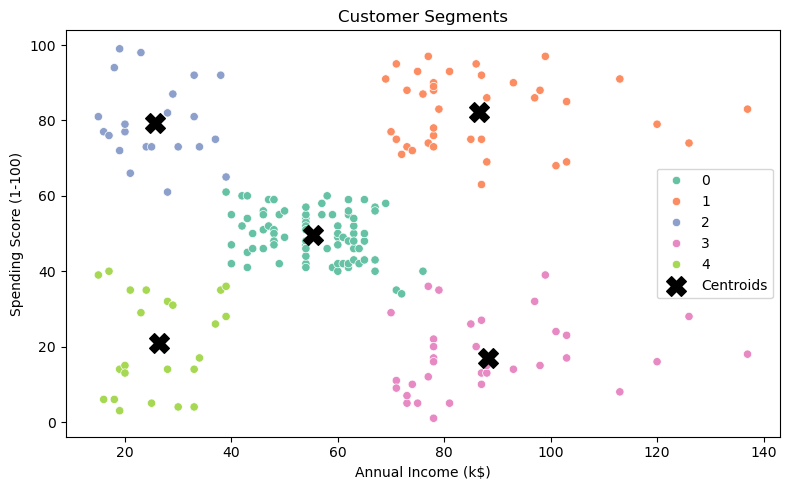

In [1]:
import gradio as gr
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the saved KMeans model
model = joblib.load("kmeans_model.pkl")

# Optional: Load customer data and generate cluster plot
def generate_plot():
    # Sample or full dataset (adjust the path if needed)
    df = pd.read_csv(r"C:\Users\91636\Downloads\Kmeans\Mall_Customers.csv")
    X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
    df['Cluster'] = model.predict(X)
    
    # Plot clusters
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2')
    centers = model.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='X', label='Centroids')
    plt.title('Customer Segments')
    plt.legend()
    plt.tight_layout()
    plt.savefig("cluster_image.png")
    return "cluster_image.png"

# Call once to generate plot
plot_path = generate_plot()

# Prediction function
def predict_cluster(income, score):
    prediction = model.predict([[income, score]])[0]
    return f"📊 Predicted Customer Cluster: {prediction}"

# Gradio UI
with gr.Blocks() as demo:
    gr.Markdown("## 🛍️ Mall Customer Segmentation (KMeans)")

    with gr.Row():
        income = gr.Slider(10, 150, value=60, label="Annual Income (k$)")
        score = gr.Slider(1, 100, value=50, label="Spending Score (1–100)")

    predict_btn = gr.Button("Predict Cluster")
    output = gr.Textbox(label="Cluster Result")

    predict_btn.click(predict_cluster, inputs=[income, score], outputs=output)

    gr.Markdown("### 📈 Cluster Visualization")
    gr.Image(value=plot_path, label="Customer Clusters")

# Launch the app
demo.launch()
